In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gamap_colormap import WhGrYlRd
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from scipy.stats import linregress
import pandas as pd
from datetime import datetime
import matplotlib as mpl
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
mpl.rc('font', **font)

ModuleNotFoundError: No module named 'gamap_colormap'

# Phase 1

In [5]:
truth = np.load('Y_2019.npy')
pred = np.load('Y_2019_pred.npy')

truth = np.reshape(truth[:, 0], (363,  33, 44))
pred = np.reshape(pred[:, 0, 0], (363,  33, 44))


FileNotFoundError: [Errno 2] No such file or directory: 'Y_2019.npy'

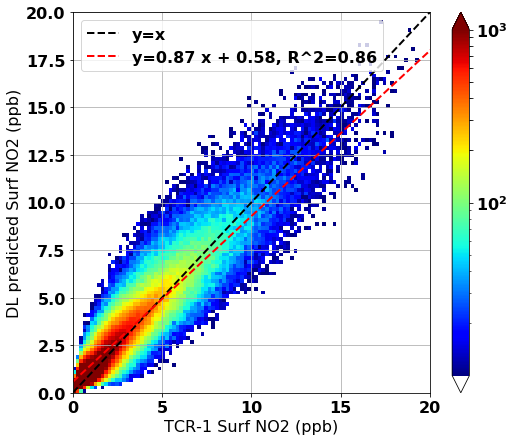

In [7]:
preds = pred.flatten()
truths = truth.flatten()

slope, intercept, r_value, p_value, std_err = linregress(truths, preds)

xx = np.arange(0, 140, 1)

fig = plt.figure(figsize=(8, 7))

my_cmap = plt.cm.jet
my_cmap.set_under('w', 1)

plt.hist2d(truths, preds, bins=100, norm=mpl.colors.LogNorm(), range=[[0, 20], [0, 20]], vmax=1000, vmin=10, cmap=plt.cm.jet)
plt.xlim((0, 20))
plt.ylim((0, 20))
plt.plot(xx, xx, 'k--', lw=2, label='y=x')

plt.plot(xx, slope*xx+intercept, 'r--', lw=2, label='y=%.2f x + %.2f, R^2=%.2f'%(slope, intercept, r_value**2))

plt.colorbar(extend='both', ticks=[0.1, 0] + list(range(0, 1100, 100)) )
plt.legend()
plt.grid()
plt.xlabel('TCR-1 Surf NO2 (ppb)')
plt.ylabel('DL predicted Surf NO2 (ppb)')

plt.savefig('correlation.pdf')

In [8]:
lon = np.array([81, 82.125, 83.25, 84.375, 85.5, 86.625, 87.75, 88.875, 90, 
    91.125, 92.25, 93.375, 94.5, 95.625, 96.75, 97.875, 99, 100.125, 101.25, 
    102.375, 103.5, 104.625, 105.75, 106.875, 108, 109.125, 110.25, 111.375, 
    112.5, 113.625, 114.75, 115.875, 117, 118.125, 119.25, 120.375, 121.5, 
    122.625, 123.75, 124.875, 126, 127.125, 128.25, 129.375])
lat = np.array([ 18.505, 19.626, 20.748, 21.869, 22.991, 24.112, 25.234, 
    26.355, 27.476, 28.598, 29.719, 30.841, 31.962, 33.084, 34.205, 35.327, 
    36.448, 37.57, 38.691, 39.813, 40.934, 42.056, 43.177, 44.299, 45.42, 
    46.542, 47.663, 48.785, 49.906, 51.028, 52.149, 53.271, 54.392])

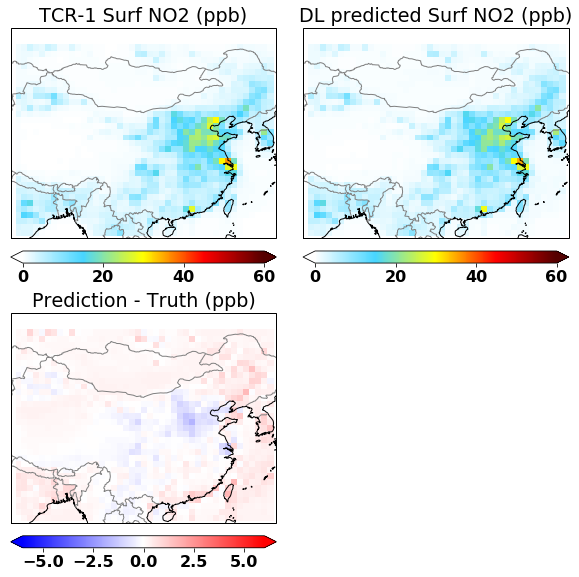

In [9]:
# indnow = 100

# truthnow = truth[indnow]
# prednow = pred[indnow]

truthnow = np.mean(truth, axis=0)
prednow = np.mean(pred, axis=0)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())
im = ax.pcolormesh(lon, lat, truthnow, transform=ccrs.PlateCarree(), cmap=WhGrYlRd, vmin=0, vmax=60)
cbar = plt.colorbar(im, fraction=0.08, pad=0.05, orientation='horizontal', extend='both')
ax.set_extent((80, 130, 18, 55))
ax.coastlines('50m')
ax.add_feature(cfeature.NaturalEarthFeature(
    'cultural', 'admin_0_boundary_lines_land', '50m',
    edgecolor='gray', facecolor='none'))

plt.title('TCR-1 Surf NO2 (ppb)')

ax = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree())
im = ax.pcolormesh(lon, lat, prednow, transform=ccrs.PlateCarree(), cmap=WhGrYlRd, vmin=0, vmax=60)
cbar = plt.colorbar(im, fraction=0.08, pad=0.05, orientation='horizontal', extend='both')
ax.set_extent((80, 130, 18, 55))
ax.coastlines('50m')
ax.add_feature(cfeature.NaturalEarthFeature(
    'cultural', 'admin_0_boundary_lines_land', '50m',
    edgecolor='gray', facecolor='none'))
plt.title('DL predicted Surf NO2 (ppb)')

ax = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree())
im = ax.pcolormesh(lon, lat, prednow - truthnow, transform=ccrs.PlateCarree(), cmap=plt.cm.bwr, vmin=-6, vmax=6)
cbar = plt.colorbar(im,fraction=0.08, pad=0.05, orientation='horizontal', extend='both')
ax.set_extent((80, 130, 18, 55))
ax.coastlines('50m')
ax.add_feature(cfeature.NaturalEarthFeature(
    'cultural', 'admin_0_boundary_lines_land', '50m',
    edgecolor='gray', facecolor='none'))
plt.title('Prediction - Truth (ppb)')


plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.savefig('map_comp.pdf')

# Time series

In [7]:
# truth = np.load('Y_2019_truth.npy')
# pred = np.load('Y_2019_pred.npy')

# truth = np.reshape(truth[:, 0], (363,  33, 44))
# pred = np.reshape(pred[:, 0, 0], (363,  33, 44))

# print(pred.shape, truth.shape)
# lon = np.array([81, 82.125, 83.25, 84.375, 85.5, 86.625, 87.75, 88.875, 90, 
#     91.125, 92.25, 93.375, 94.5, 95.625, 96.75, 97.875, 99, 100.125, 101.25, 
#     102.375, 103.5, 104.625, 105.75, 106.875, 108, 109.125, 110.25, 111.375, 
#     112.5, 113.625, 114.75, 115.875, 117, 118.125, 119.25, 120.375, 121.5, 
#     122.625, 123.75, 124.875, 126, 127.125, 128.25, 129.375])
# lat = np.array([ 18.505, 19.626, 20.748, 21.869, 22.991, 24.112, 25.234, 
#     26.355, 27.476, 28.598, 29.719, 30.841, 31.962, 33.084, 34.205, 35.327, 
#     36.448, 37.57, 38.691, 39.813, 40.934, 42.056, 43.177, 44.299, 45.42, 
#     46.542, 47.663, 48.785, 49.906, 51.028, 52.149, 53.271, 54.392])

# print(lon.shape, lat.shape)

(363, 33, 44) (363, 33, 44)
(44,) (33,)


In [3]:
import netCDF4 as nc
import matplotlib as mpl
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 25}
mpl.rc('font', **font)

fh = nc.Dataset('no2_2019_t106_China.nc')
lon =  fh.variables['lon'][:]
lat = fh.variables['lat'][:]
truth = fh.variables['no2'][:]/1e3
fh.close()

In [4]:
df = pd.read_table('China_obs.txt', delimiter=',')
df = df[df['Date'].str.contains("2019")]


cities = [ 'beijing', 'shanghai', 'guangzhou', 'chengdu', 'shijiazhuang', 
          'hefei', 'zhuzhou', 'taiyuan' ]

plt.figure(figsize=(25, 15))
curr = 1
for cc in cities:
    subnow = df.loc[ df['Station'] == cc ]

    time  = subnow['Date'].values

    time = np.array([datetime.strptime(s, '%Y-%m-%d') for s in time])

    doy = np.array([s.timetuple().tm_yday for s in time])

    lonnow = subnow['Lon'].values[0]
    latnow = subnow['Lat'].values[0]

    ix = np.argmin( abs(lonnow - lon) )
    iy = np.argmin( abs(latnow - lat) )
    it = doy - 3

    prednow = pred[:, iy, ix]
    truthnow = truth[:, iy, ix]
    insitu = subnow['NO2'].values / 1.91 # convert to ppb
    print(insitu.shape, prednow.shape, truthnow.shape)

    xx = np.arange(1, 366, 1)

    ax = plt.subplot(4, 2, curr)
    ax.plot(doy, insitu, 'k-', lw=5, label='In situ')
#     ax.plot(xx, prednow, label='DL prediction')
    ax.plot(xx, truthnow, label='TCR-2')
    ax.grid()
    plt.ylabel('Surf NO2 (ppb)')
    plt.xlabel('Day of year')
    plt.title(cc)
    
    curr += 1
    

plt.subplots_adjust(left=0.05, wspace=0.15, hspace=0.4, right=0.88, top=0.95, bottom=0.05)
ax.legend(bbox_to_anchor=(1.00, 0.95))
plt.savefig('NO2_station_comp.png', dpi=400)

NameError: name 'pred' is not defined

<Figure size 1800x1080 with 0 Axes>